In [2]:
import numpy as np
import pandas as pd
import os
import re
import string
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import seaborn as sns
import plotly.figure_factory as ff
from wordcloud import WordCloud


In [3]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [6]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
stemmer = nltk.SnowballStemmer("english")

def preprocess_text(text):
    # Remove URLs, special characters, and convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r'<.*?>',' ',text)
    text = re.sub(r'[0-9]', '', text)
    text = re.sub('@\S+', '', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)

    text = text.lower()
    text = text.split()

    text = [stemmer.stem(words) for words in text if words not in stopwords.words('english')]

    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

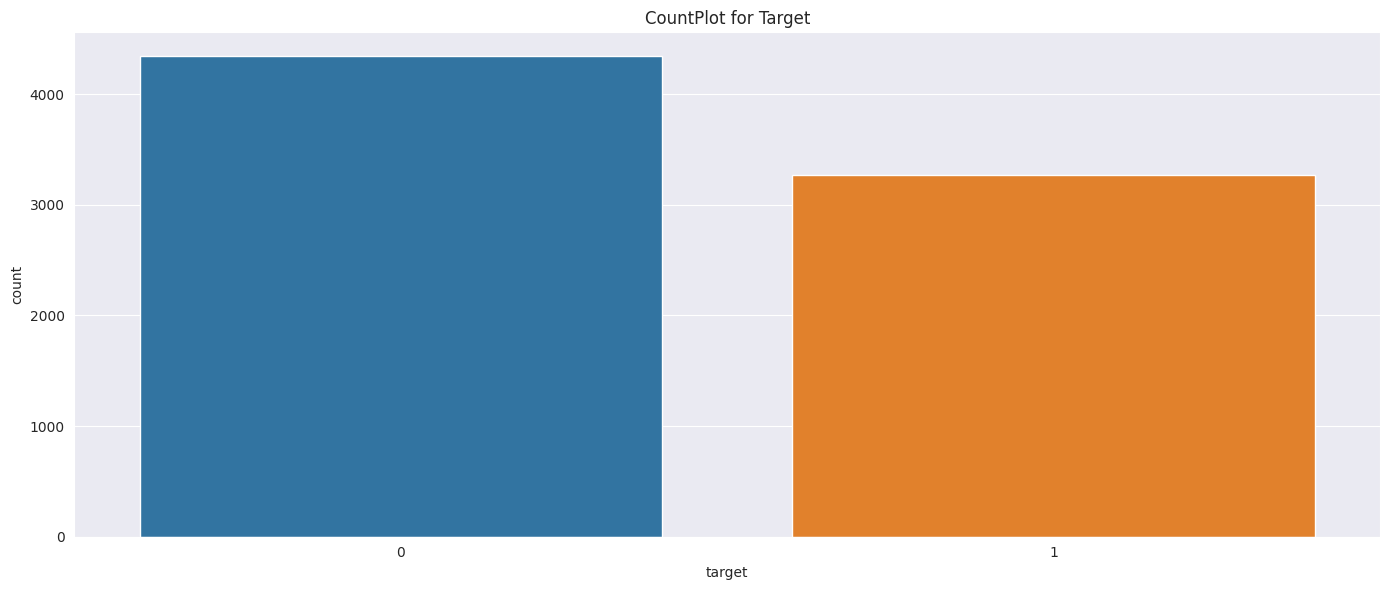

In [9]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(data=train_df, x='target')
plt.title('CountPlot for Target')
plt.tight_layout()
plt.show()

In [10]:
train_df['length'] = train_df['text'].apply(len)

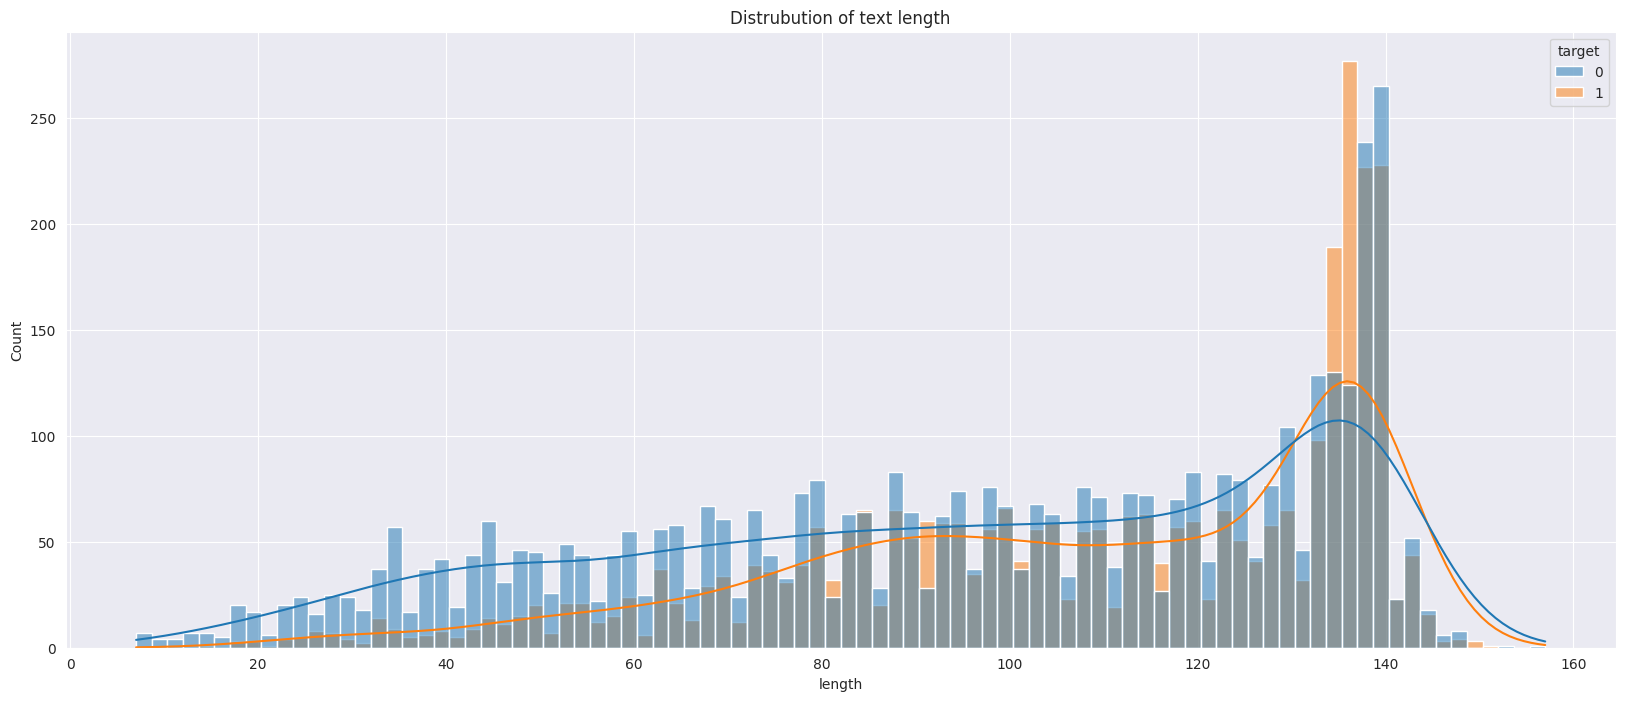

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(20,8))
sns.histplot(data=train_df,x='length',hue='target',kde= True,bins=90)
plt.title('Distrubution of text length')
plt.show()
plt.tight_layout()

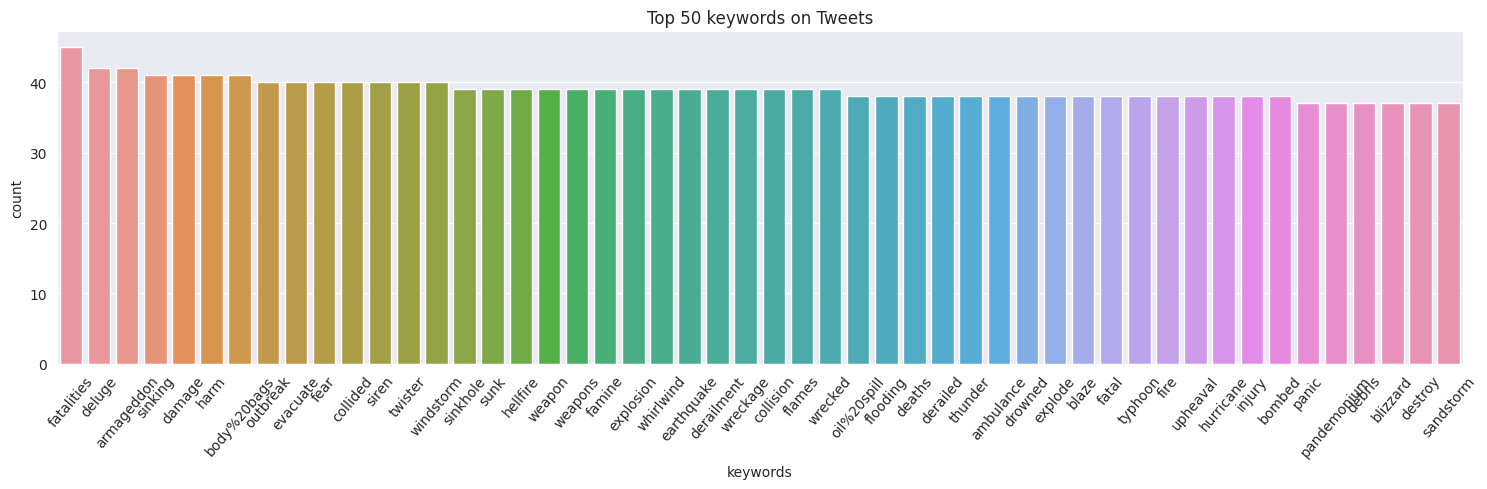

In [16]:
keyword = train_df.groupby('keyword')['target'].count()
df_key = pd.DataFrame({'keywords':keyword.index,'count':keyword.values}).sort_values(by='count',ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=df_key.head(50),x='keywords',y='count')
plt.xticks(rotation = 50)
plt.title('Top 50 keywords on Tweets')
plt.tight_layout()
plt.show()

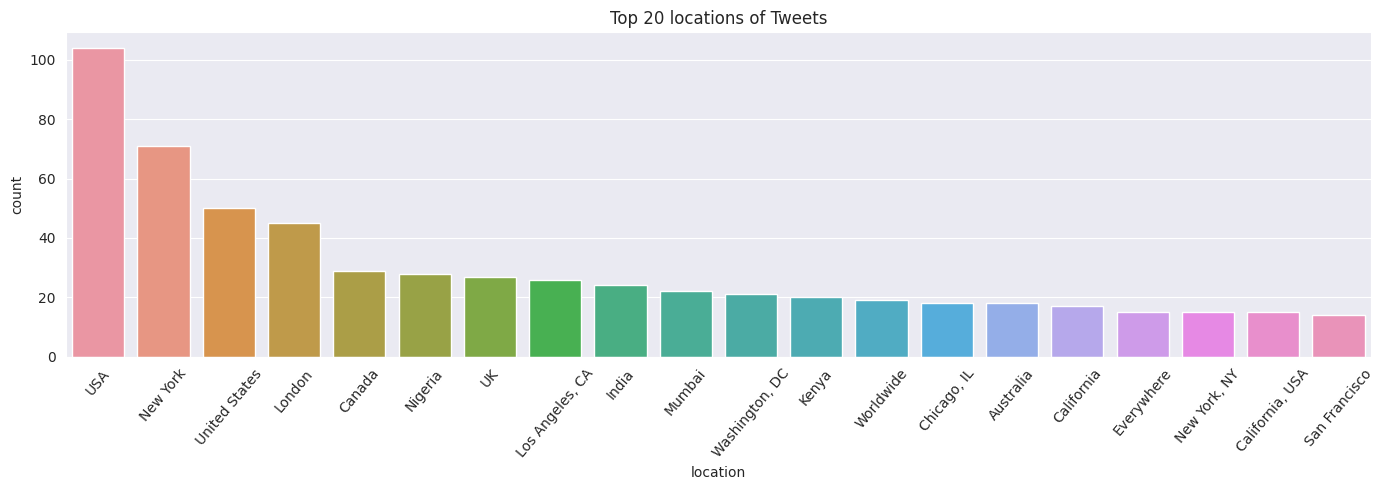

In [17]:
location = train_df.groupby('location')['target'].count()
df_loc = pd.DataFrame({'location':location.index,'count':location.values}).sort_values(by='count',ascending=False)

# Top 20 Location in the tweets
plt.figure(figsize=(14,5))
sns.barplot(data=df_loc.head(20),x='location',y='count')
plt.xticks(rotation = 50)
plt.title('Top 20 locations of Tweets')
plt.tight_layout()
plt.show()

In [18]:
train_df['keyword'].fillna('', inplace=True)
train_df['location'].fillna('', inplace=True)
test_df['keyword'].fillna('', inplace=True)
test_df['location'].fillna('', inplace=True)

In [22]:
nltk.download('stopwords')
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
train_df.head()

,id,keyword,location,text,target,length
0,1,,,deed reason earthquak may allah forgiv,1,69
1,4,,,forest fire near rong sask canada,1,38
2,5,,,resid ask ishelt place notifi offic evacu shel...,1,133
3,6,,,peopl receiv wildfir evacu order california,1,65
4,7,,,got sent photo rubi alaska smoke wildfir pour ...,1,88


In [24]:
disaster = ' '.join(train_df[train_df['target']==1]['text'])
non_disaster =''.join(train_df[train_df['target']==0]['text'])

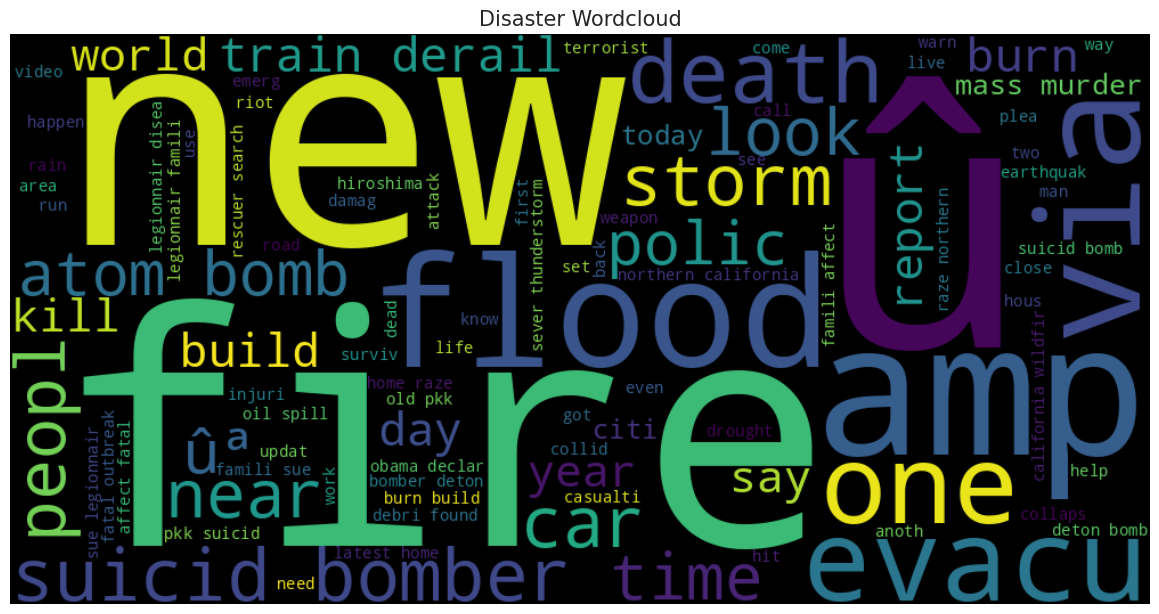

In [26]:
plt.figure(figsize=(14,6))
wordcloud = WordCloud(width=1000,height=500,max_words=100).generate(disaster)
plt.imshow(wordcloud,interpolation='bilinear',cmap='magma')
plt.axis('off')
plt.tight_layout()
plt.title('Disaster Wordcloud',fontsize= 15)
plt.show()

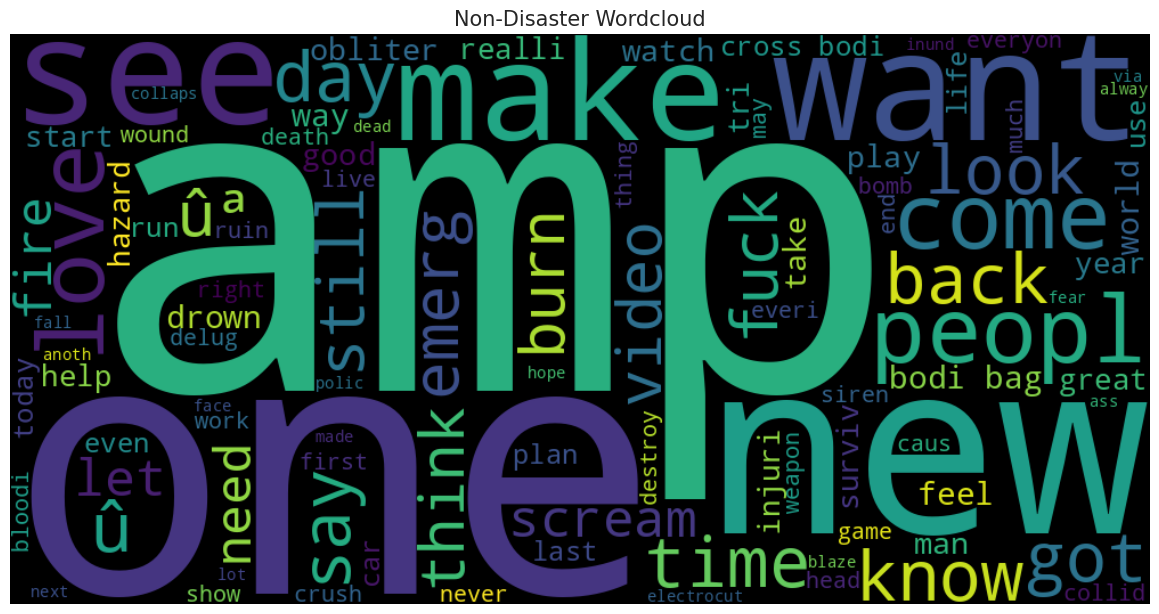

In [28]:
plt.figure(figsize=(14,6))
wordcloud = WordCloud(width=1000,height=500,max_words=100).generate(non_disaster)
plt.imshow(wordcloud,interpolation='bilinear',cmap='magma')
plt.axis('off')
plt.tight_layout()
plt.title('Non-Disaster Wordcloud',fontsize= 15)
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords.words('english'))

X = tfidf_vectorizer.fit_transform(train_df['text']).toarray()
y = train_df['target']

In [32]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

In [35]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7906884202148826


              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1440
           1       0.81      0.67      0.73      1073

    accuracy                           0.79      2513
   macro avg       0.79      0.78      0.78      2513
weighted avg       0.79      0.79      0.79      2513



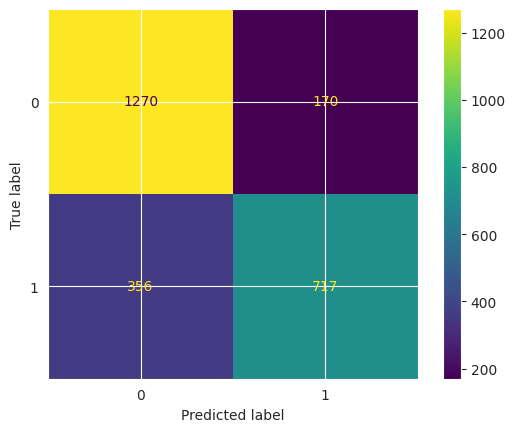

In [39]:
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
score_mnb = accuracy_score(y_test,y_pred)

In [41]:
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=50, random_state=42)
pipe_rf = make_pipeline(rf)
pipe_rf.fit(X_train,y_train)
pred = pipe_rf.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, pred)

print("Accuracy:", accuracy)

Accuracy: 0.6633505769996021


              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1440
           1       0.81      0.67      0.73      1073

    accuracy                           0.79      2513
   macro avg       0.79      0.78      0.78      2513
weighted avg       0.79      0.79      0.79      2513



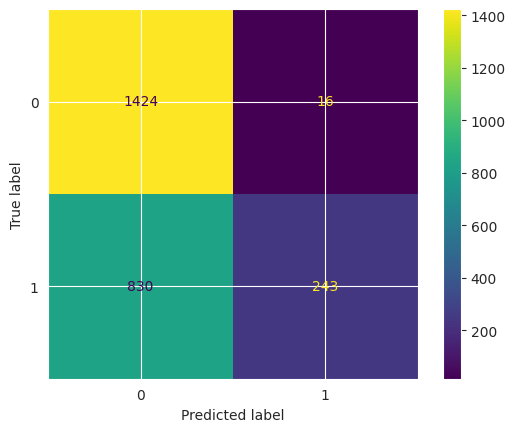

In [44]:
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot()
score_rf = accuracy_score(y_test,pred)

In [46]:
roc_auc = roc_auc_score(y_test, mnb.predict_proba(X_test)[:, 1])
print("Multinomial NB - ROC-AUC Score:", roc_auc)

roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("Random Forest Clasifier - ROC-AUC Score:", roc_auc)

Multinomial NB - ROC-AUC Score: 0.8565680982706845
Random Forest Clasifier - ROC-AUC Score: 0.8058827146111629


In [47]:
data = {'modles': ['Random Forest Classifier','Multinomial NB'],
        'Score': [score_rf,score_mnb]}
df =pd.DataFrame(data)
df['Score'] =df['Score']*100
df.sort_values(by='Score',ascending=False)

,modles,Score
1,Multinomial NB,79.068842
0,Random Forest Classifier,66.335058


In [48]:
X_test = tfidf_vectorizer.transform(test_df['text']).toarray()

In [49]:
test_df['target'] = mnb.predict(X_test)

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)


In [57]:
submission_df = test_df[['id', 'target']]
submission_df.to_csv('submission.csv', index=False)